In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')

customers = pd.read_csv('data/olist_customers_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
products_translation = pd.read_csv('data/product_category_name_translation.csv')

In [9]:
# data pre-process
orders_cleaned = orders[orders['order_status']!='canceled']
products['volume'] = products['product_length_cm']*products['product_height_cm']*products['product_width_cm']
productsTranslated = pd.merge(products, products_translation, on='product_category_name', how='inner')

# merge datasets
order_sales = pd.merge(orders_cleaned, order_payments, on='order_id', how='inner')
orderItems = pd.merge(orders_cleaned, order_items, on='order_id', how='inner')
order_products = pd.merge(orderItems, productsTranslated, on='product_id', how='inner')
order_products = order_products.rename(columns={'product_category_name_english':'product_category'})

## Analysis:

In [10]:
# top 10 most popular product categories
order_products['product_category'].value_counts()[0:10]

bed_bath_table           11097
health_beauty             9634
sports_leisure            8590
furniture_decor           8298
computers_accessories     7781
housewares                6915
watches_gifts             5970
telephony                 4527
garden_tools              4328
auto                      4205
Name: product_category, dtype: int64

/var/folders/rz/_nyqj12d6695z910qshyf3jr0000gn/T/ipykernel_28023/3295297544.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top10_avg = order_products.groupby('product_category').mean().loc[top10]


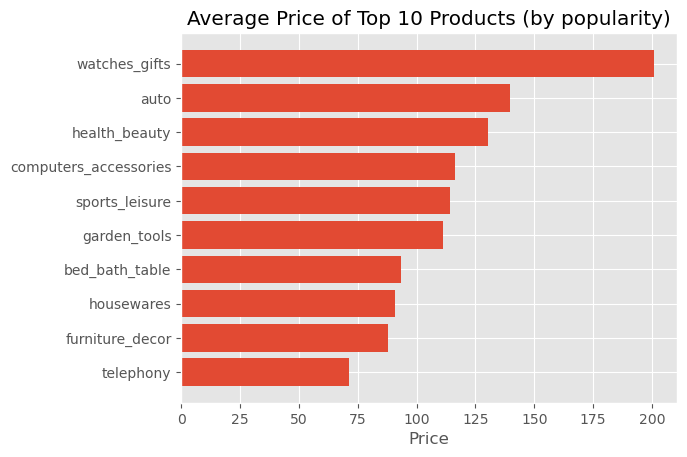

In [18]:
# average price/volume of the top 10 most popular products
top10 = order_products['product_category'].value_counts()[0:10].index
top10_avg = order_products.groupby('product_category').mean().loc[top10]
top10_avg_price = top10_avg['price'].sort_values(ascending=True)
plt.barh(y=top10_avg_price.index,
        width=top10_avg_price)
plt.xlabel("Price")
#plt.ylabel("Products")
plt.title("Average Price of Top 10 Products (by popularity)")
# save plot
plt.savefig('figures/average_price_top10_products.png', bbox_inches="tight")
plt.show()


/var/folders/rz/_nyqj12d6695z910qshyf3jr0000gn/T/ipykernel_28023/909656669.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top10_total = order_products.groupby('product_category').sum().loc[top10, ['price','volume']]


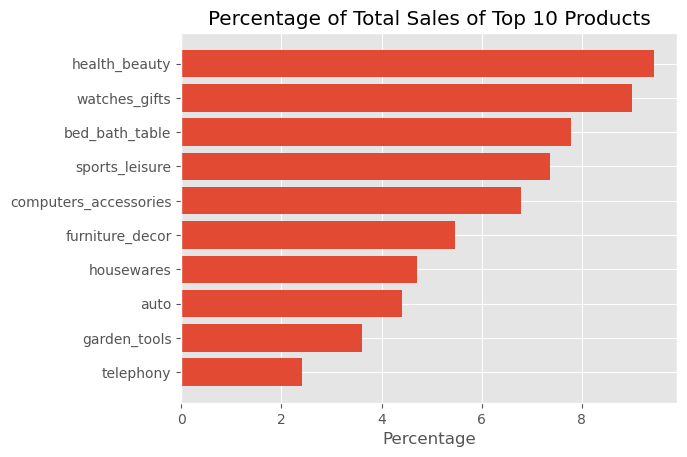

In [16]:
# percentage of total sales of top 10 most popular products
top10_total = order_products.groupby('product_category').sum().loc[top10, ['price','volume']]
top10_total_price = top10_total['price']
top10_total_price_perc = (top10_total_price/order_products['price'].sum())*100
top10_total_price_perc = top10_total_price_perc.sort_values()
plt.barh(y=top10_total_price_perc.index,
        width=top10_total_price_perc)
plt.xlabel('Percentage')
#plt.ylabel("Products")
plt.title("Percentage of Total Sales of Top 10 Products")
# save plot
plt.savefig('figures/total_sales_perc_top10_products.png', bbox_inches="tight")
plt.show()

In [13]:
top10_total_price_perc.sum()

60.98113340829942